### Imports

In [1]:
import os

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Getting data

In [2]:
workdir = os.getcwd() + "/data/"
training_path = workdir + "train.csv"
test_path = workdir + "test.csv"

In [3]:
df_train = pd.read_csv(training_path)
df_test = pd.read_csv(test_path)

### Data exploration

In [7]:
df_train.head(10).style.background_gradient()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


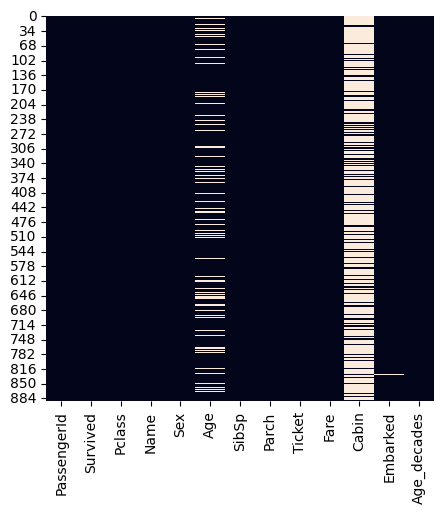

In [24]:
def plot_missing_data(dataset):
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(dataset.isnull(), cbar=False)

plot_missing_data(df_train)

In [11]:
df_train['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [12]:
df_train.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [13]:
df_train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [11]:
df_train['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

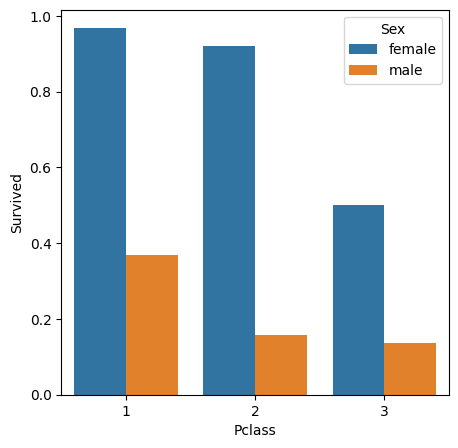

In [25]:
def bar_chart_compare(dataset, x_feature1, y_feature, x_feature2=None):
    plt.figure(figsize=[5,5])
    g = sns.barplot(x=x_feature1, y=y_feature, hue=x_feature2, errorbar=None, data=dataset) 
    
bar_chart_compare(dataset=df_train, x_feature1='Pclass', x_feature2='Sex', y_feature='Survived')

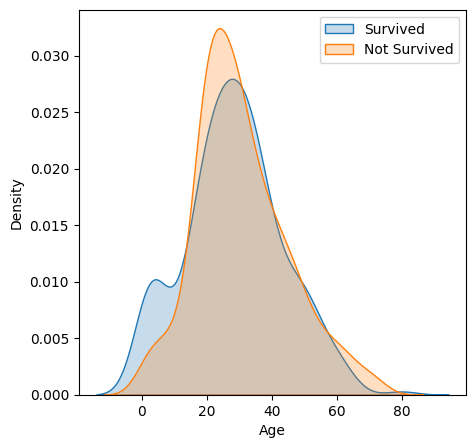

In [32]:
def plot_kernel_density(dataset, x_feature, y_feature):
    fig, ax = plt.subplots(figsize=(5,5))
    sns.kdeplot(dataset[x_feature].loc[dataset[y_feature] == 1], fill=True, ax=ax, label=y_feature).set_xlabel(x_feature)
    sns.kdeplot(dataset[x_feature].loc[dataset[y_feature] == 0], fill=True, ax=ax, label=f"Not {y_feature}")
    plt.legend()
plot_kernel_density(df_train, 'Age', 'Survived')

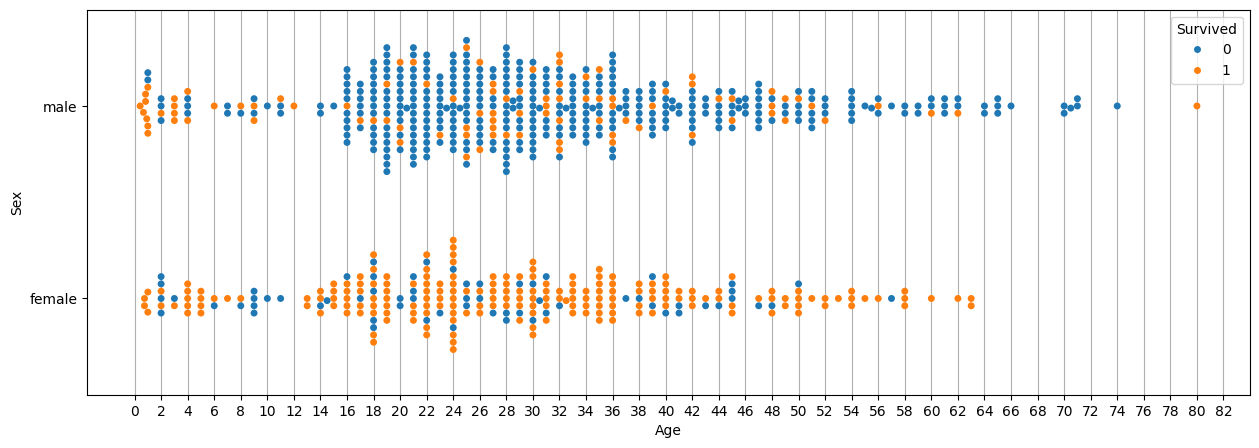

In [42]:
def plot_swarm(dataset, x_feature, y_feature, h_feature=None):
    fig, ax = plt.subplots(figsize=[15,5])
    plt.xticks(list(range(0, 100, 2)))
    ax.grid(True)
    sns.swarmplot(data=dataset, x=x_feature, y=y_feature, hue=h_feature)
plot_swarm(dataset=df_train, x_feature='Age', y_feature='Sex', h_feature='Survived')

In [33]:
df_train['Age_decades'] = (df_train['Age']/10).fillna(0).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_decades
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [34]:
df_train.groupby('Age_decades').Survived.mean()

Age_decades
0    0.376569
1    0.401961
2    0.350000
3    0.437126
4    0.382022
5    0.416667
6    0.315789
7    0.000000
8    1.000000
Name: Survived, dtype: float64

In [35]:
df_train.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [36]:
df_train.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [37]:
df_train.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64